In [455]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [573]:
dataSet = pd.read_csv("property-sales-data-2020.csv")
dataSet = dataSet[dataSet.PropType == 'Residential'].drop("PropType", axis=1)
dataSet = dataSet[dataSet.Sale_price < 600000]
dataSet = dataSet.drop(['PropertyID','taxkey','Address','CondoProject','Sale_date','nbhd', 'CondoProject', "Style", "District", "Units", "Bdrms", "Stories",'Lotsize'], axis = 1)
dataSet = dataSet.dropna(axis=0)


In [594]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop="first")
encoding = pd.DataFrame(onehot_encoder.fit_transform(dataSet[["Extwall"]]), columns=[f"Extwall{i}" for i in range(10)], index=dataSet.index)
dataSet = pd.concat((dataSet, encoding), axis=1).drop("Extwall", axis=1)
VanGough = dataSet.copy()

              Year_Built     Rooms  FinishedSqft     Fbath     Hbath  \
Year_Built      1.000000 -0.373717     -0.217231 -0.176332  0.286538   
Rooms          -0.373717  1.000000      0.825618  0.606803 -0.031309   
FinishedSqft   -0.217231  0.825618      1.000000  0.688518  0.109745   
Fbath          -0.176332  0.606803      0.688518  1.000000 -0.162116   
Hbath           0.286538 -0.031309      0.109745 -0.162116  1.000000   
Sale_price      0.145231  0.157779      0.391229  0.312736  0.228004   
Extwall0       -0.037470 -0.017090     -0.111320 -0.037550 -0.084153   
Extwall1       -0.188743  0.107838      0.039453  0.047602 -0.058090   
Extwall2        0.009017 -0.013574     -0.021412 -0.008885 -0.032212   
Extwall3        0.173630 -0.105489     -0.021436 -0.040122  0.075221   
Extwall4        0.105251  0.013575      0.099583  0.083787  0.097006   
Extwall5        0.029329  0.094257      0.146490  0.074615  0.081288   
Extwall6        0.113082 -0.001981      0.074366  0.059821  0.05

<AxesSubplot:>

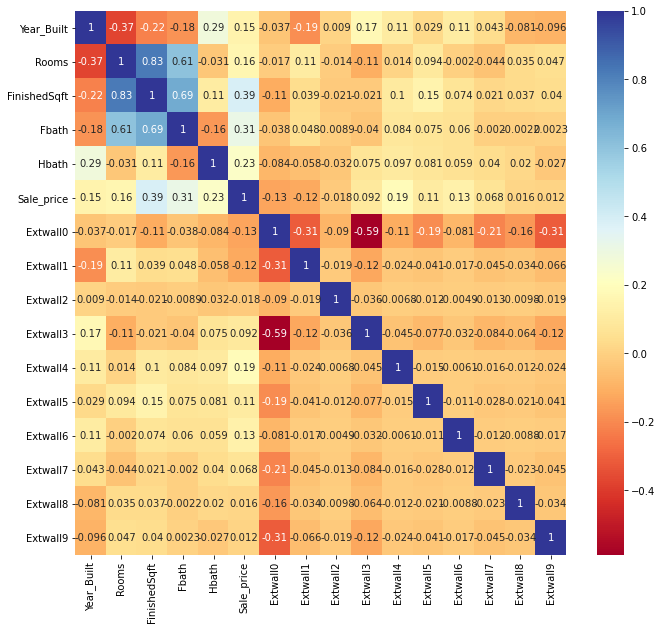

In [595]:
#Correlation matrix
cor_matrix = VanGough.corr()
print(cor_matrix)
plt.figure(figsize=(11,10))
sns.heatmap(cor_matrix, annot=True, cmap=plt.cm.RdYlBu)

In [596]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#VanGough['PropType'] = label_encoder.fit_transform(VanGough['PropType'])
#VanGough['Extwall'] = label_encoder.fit_transform(VanGough['Extwall'])
#VanGough['Style'] = label_encoder.fit_transform(VanGough['Style'])
# print(transPropType)
#print(transExtwall)
#print(transStyle)
#VanGough


In [597]:
X = VanGough.drop('Sale_price', axis = 1)
Y = VanGough['Sale_price']
X = (X - X.min())/ (X.max() - X.min()) 


In [598]:
X

,Year_Built,Rooms,FinishedSqft,Fbath,Hbath,Extwall0,Extwall1,Extwall2,Extwall3,Extwall4,Extwall5,Extwall6,Extwall7,Extwall8,Extwall9
0,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.917647,0.523810,0.400345,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.917647,0.476190,0.501055,0.500000,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.941176,0.333333,0.311721,0.333333,0.1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.238095,0.110301,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4683,0.652941,0.238095,0.071744,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4684,0.647059,0.238095,0.083829,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4685,0.647059,0.238095,0.083829,0.166667,0.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [599]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state = 0)
print(x_train.shape, y_train.shape) #3516 datapoints in train
print(x_test.shape, y_test.shape) #1173 datapoints in test

(2913, 15) (2913,)
(971, 15) (971,)


In [600]:
mlr = LinearRegression()
mlr_model = mlr.fit(x_train, y_train)
print(mlr_model.intercept_)
print(mlr_model.coef_)

154540.88888382734
[  47294.9539743  -251509.67288382  360962.5977555   147236.38514476
  199188.54842709  -49891.70041676  -71916.23638388  -48298.9536971
  -38050.44756365   36398.09050915  -24552.88903474   32170.64070526
  -32215.88069674  -29897.39232486  -38147.88477784]


In [601]:
mlr_predict_train = mlr.predict(x_train)
mlr_predict_test = mlr.predict(x_test)
print(mlr_predict_train)
print(mlr_predict_test)

[106745.36099374 149666.04816419 148640.9065431  ... 200434.31124105
 223921.35954752 133338.62969823]
[104538.17758273 191993.43242326 183371.21771574 142272.80077751
 132108.30824236 141824.8044228  194542.8054943  148227.99297101
 140629.2548951  123509.97847039 155281.45398301 178550.3537185
 139846.2162562  157948.50450225 144782.19647912 208523.1503617
 160368.26478691 138330.28217281 144016.09809901 154884.98188889
 188568.33537068 120300.99626982 161249.69749733 200277.10229286
 180337.46332291 143992.87931704 198213.03960768 187480.20297724
 175135.03975665 167594.99305692 140169.91166102 156107.54893167
 349781.61423212 126457.55056336 176402.59312139 358216.12899918
 174482.80945611 162064.89677966 165023.11624961 145329.91161286
 183885.36052621 181025.69102968 236459.50461554 172911.59366882
 158115.35020689 144223.32525417 174431.49243579 116414.75922579
 168421.43789911 187686.94509567 152509.00297268 198517.01505583
 246562.52160007 171391.24004339 119204.58125496 14380

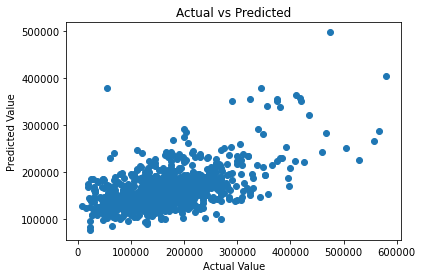

In [602]:
plt.scatter(y_test, mlr_predict_test);
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted");

In [603]:
mse_train = mean_squared_error(y_train,mlr_predict_train)
np.sqrt(mse_train)

67179.21540987134

In [604]:
mse_test = mean_squared_error(y_test,mlr_predict_test)
np.sqrt(mse_test)

66796.48532192908

In [605]:
print('R-squared score (training): {:.3f}'.format(mlr_model.score(x_train, y_train)))
print(f'R-squared score (test): {mlr_model.score(x_test, y_test):.3f}')

R-squared score (training): 0.300
R-squared score (test): 0.320


In [606]:
import statsmodels.api as sm
Ols_reg = sm.OLS(y_train,sm.add_constant(x_train))
results = Ols_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_price   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     82.94
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          1.37e-211
Time:                        19:42:05   Log-Likelihood:                -36512.
No. Observations:                2913   AIC:                         7.306e+04
Df Residuals:                    2897   BIC:                         7.315e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.545e+05   6.82e+04      2.266   

In [607]:
influence = results.get_influence()
# pd.Series(influence.hat_matrix_diag).describe()
influence.summary_frame()

,dfb_const,dfb_Year_Built,dfb_Rooms,dfb_FinishedSqft,dfb_Fbath,dfb_Hbath,dfb_Extwall0,dfb_Extwall1,dfb_Extwall2,dfb_Extwall3,...,dfb_Extwall6,dfb_Extwall7,dfb_Extwall8,dfb_Extwall9,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
3077,-0.001987,0.003252,0.019324,-0.044232,0.040440,0.009704,-0.000220,0.006989,-0.000166,-0.000034,...,0.000701,0.000241,0.000267,0.000074,7.595133e-04,1.314704,0.006982,0.110237,1.314869,0.110251
4676,-0.000323,0.015356,-0.000631,0.000971,-0.006710,-0.012021,-0.000217,0.000008,-0.000342,-0.000318,...,-0.000429,-0.000236,-0.000019,0.003476,1.802991e-04,0.675092,0.006290,0.053710,0.675028,0.053705
1855,-0.000257,0.000131,0.000990,-0.000176,0.000869,0.001779,0.000081,0.000074,0.000093,-0.000153,...,0.000032,0.000078,0.000066,0.000079,2.480297e-06,-0.128425,0.002400,-0.006300,-0.128403,-0.006299
4534,0.000161,-0.001271,0.000296,0.001300,-0.003551,0.001530,0.000033,0.000025,0.000040,-0.000299,...,0.000064,0.000015,-0.000014,0.000010,5.105933e-06,-0.180433,0.002503,-0.009039,-0.180403,-0.009037
1150,-0.003601,0.003480,0.019105,-0.009078,0.008577,0.013907,0.000557,0.001124,0.001305,0.001346,...,0.001086,0.001368,0.001169,0.001256,1.126968e-04,-1.193743,0.001264,-0.042463,-1.193831,-0.042467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-0.000425,0.006995,0.002002,0.001228,-0.006227,-0.006597,0.000317,0.000190,0.000041,0.000087,...,0.000065,0.000126,0.000177,0.000146,1.074404e-05,0.347597,0.001421,0.013111,0.347545,0.013109
4038,0.002751,-0.019036,-0.033065,0.023224,0.023392,-0.016967,0.000644,-0.001000,-0.000689,-0.000766,...,-0.001347,-0.000915,-0.000825,-0.000893,3.893258e-04,2.383754,0.001095,0.078925,2.385683,0.078989
1854,0.000545,-0.000216,-0.001884,0.008852,-0.014642,0.007361,-0.000023,0.000043,0.000015,-0.000093,...,-0.000248,0.010162,-0.000199,-0.000093,5.971587e-04,0.871107,0.012435,0.097747,0.871071,0.097743
3320,-0.000690,0.002625,0.035120,-0.041389,-0.014444,0.009869,0.000279,-0.005316,0.000209,0.000513,...,0.002259,0.000780,0.000514,0.000456,5.910760e-04,-1.027682,0.008875,-0.097248,-1.027692,-0.097249


In [608]:
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(x_train)

from sklearn.linear_model import Ridge

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 0)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

reg_ridge = Ridge(alpha=100.0).fit(x_train_scaled, y_train)

print('ridge model intercept: {}'
     .format(reg_ridge.intercept_))
print('ridge model coeff:\n{}'
     .format(reg_ridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(reg_ridge.score(x_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg_ridge.score(x_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(reg_ridge.coef_ != 0)))

ridge model intercept: 165956.90731204944
ridge model coeff:
[  7653.24464509 -21719.57337606  35106.54885995  15577.93739543
  11507.81713254  -3802.1904034   -7164.34695345   -464.63149047
   2022.16631822   7449.90298209   3265.88171753   5787.78415271
   2014.44145464   1655.79550359   1085.00047065]
R-squared score (training): 0.298
R-squared score (test): 0.314
Number of non-zero features: 15


In [609]:
reg_ridge_predict_train = reg_ridge.predict(x_train)
reg_ridge_predict_test = reg_ridge.predict(x_test)
print(reg_ridge_predict_train)
print(reg_ridge_predict_test)




[163800.89684578 173116.20157632 173634.01288394 ... 177570.79258579
 175547.10818758 167585.64344122]
[163708.16454644 177334.7829166  177495.73699479 173239.86282843
 167699.48192749 167871.11614098 178655.17623586 169357.38890551
 167225.67791125 166588.97245265 169261.40859061 176138.48089557
 168200.59784217 170206.78215659 168056.84766363 180571.98037751
 169311.9411867  168160.92888552 167370.63063784 174515.5519653
 176789.50720922 166219.52367494 170393.82351244 178551.65856146
 171554.61869652 173150.86382372 178832.40234105 176971.05872055
 171561.20754959 171846.84028282 172048.93443667 169175.26904649
 188376.76721957 166633.85333504 175911.6323793  191870.71698459
 171339.60047973 169790.59223913 175729.19620307 169029.94016172
 177156.46141587 176222.40768957 182031.04684546 170135.71015532
 169559.82142926 168841.84322601 176518.50802743 165715.82621845
 170565.62305947 171596.54924541 169306.42756342 175239.74355499
 182145.90590585 171847.16553247 165990.62427775 1716

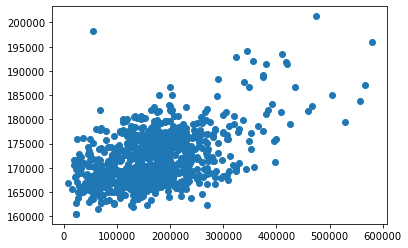

In [610]:
plt.scatter(y_test, reg_ridge_predict_test);

In [611]:
mse_ridge_train = mean_squared_error(y_train,reg_ridge_predict_train)
mse_ridge_train

6066526668.285903

In [612]:
mse_ridge_test = mean_squared_error(y_test,reg_ridge_predict_test)
mse_ridge_test

6187448092.1080675

In [613]:
print('R-squared score (training): {:.3f}'
     .format(reg_ridge.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(reg_ridge.score(x_test, y_test)))

R-squared score (training): 0.060
R-squared score (test): 0.057
